In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df["X1"] = [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df["X2"] = [5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df["label"] = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

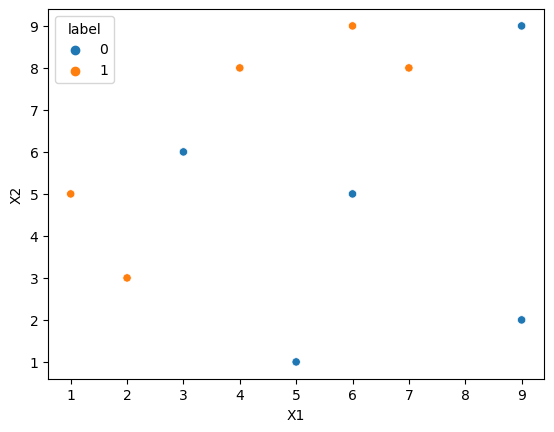

In [5]:
import seaborn as sns
sns.scatterplot(x=df["X1"], y=df["X2"], hue=df["label"])

In [6]:
df.shape

(10, 3)

In [7]:
df.shape[0]

10

In [8]:
df["sample_weights"] = 1/df.shape[0]

In [9]:
df

,X1,X2,label,sample_weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [10]:
from sklearn.tree import DecisionTreeClassifier
DT1 = DecisionTreeClassifier(max_depth=1)

In [11]:
X = df.iloc[:, 0:2]

In [12]:
y = df.iloc[:, 2]

In [13]:
X

,X1,X2
0,1,5
1,2,3
2,3,6
3,4,8
4,5,1
5,6,9
6,6,5
7,7,8
8,9,9
9,9,2


In [14]:
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [15]:
DT1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

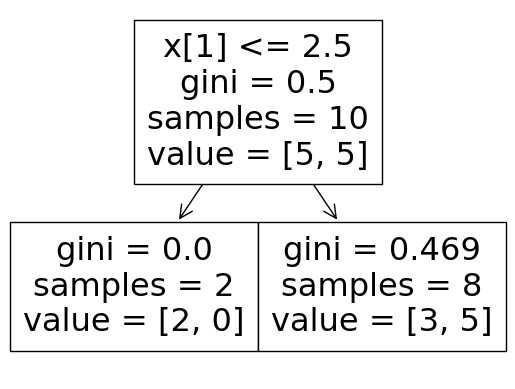

In [16]:
from sklearn.tree import plot_tree
plot_tree(DT1)

C:\Users\Rishav\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

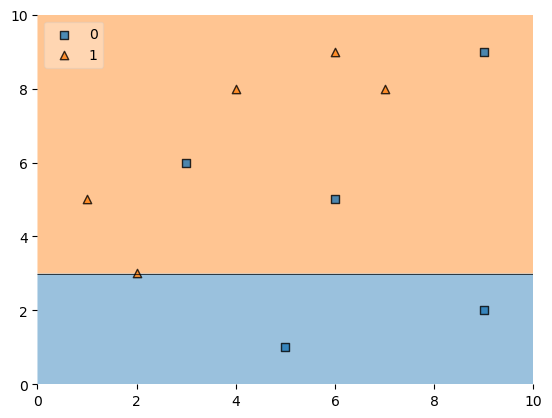

In [17]:
plot_decision_regions(np.array(X), np.array(y), clf=DT1, legend=2)

In [18]:
DT1 = DecisionTreeClassifier(max_depth=1)
X = df.iloc[:, 0:2]
y = df.iloc[:, 2]
DT1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

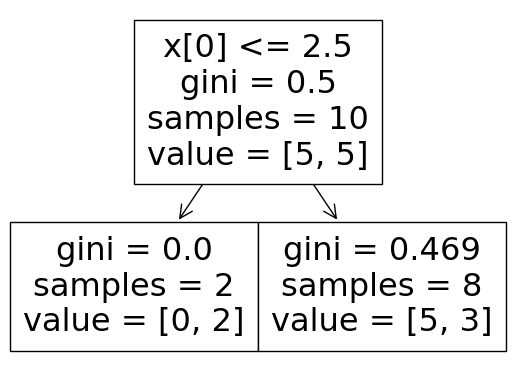

In [19]:
from sklearn.tree import plot_tree
plot_tree(DT1)

C:\Users\Rishav\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

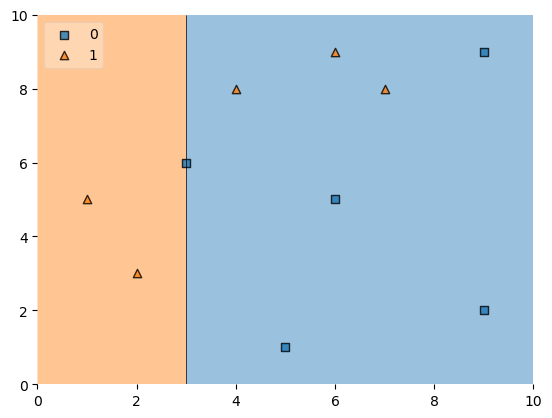

In [20]:
plot_decision_regions(np.array(X), np.array(y), clf=DT1, legend=2)

In [21]:
df['y_pred'] = DT1.predict(X)

In [22]:
df

,X1,X2,label,sample_weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [23]:
# performance of stump
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [24]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [25]:
# calculate the updated weight
def update_row_weights(row, alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['sample_weights'] * np.exp(-alpha)
    else:
        return row['sample_weights'] * np.exp(alpha)

In [26]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

In [27]:
df

,X1,X2,label,sample_weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [28]:
df['sample_weights'].sum()

1.0

In [29]:
df['updated_weights'].sum()

0.9165153319682015

In [30]:
df['normalized_weights'] = df['updated_weights']/df['sample_weights'].sum()

In [31]:
df

,X1,X2,label,sample_weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.065508
1,2,3,1,0.1,1,0.065508,0.065508
2,3,6,0,0.1,0,0.065508,0.065508
3,4,8,1,0.1,0,0.152653,0.152653
4,5,1,0,0.1,0,0.065508,0.065508
5,6,9,1,0.1,0,0.152653,0.152653
6,6,5,0,0.1,0,0.065508,0.065508
7,7,8,1,0.1,0,0.152653,0.152653
8,9,9,0,0.1,0,0.065508,0.065508
9,9,2,0,0.1,0,0.065508,0.065508


In [32]:
df['normalized_weights'].sum()

0.9165153319682015

In [33]:
np.cumsum(df['normalized_weights'])

0    0.065508
1    0.131016
2    0.196524
3    0.349177
4    0.414685
5    0.567338
6    0.632846
7    0.785500
8    0.851007
9    0.916515
Name: normalized_weights, dtype: float64

In [34]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']
df[['X1', 'X2', 'label', 'sample_weights', 'y_pred', 'updated_weights', 'cumsum_lower', 'cumsum_upper']]

,X1,X2,label,sample_weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.065508
1,2,3,1,0.1,1,0.065508,0.065508,0.131016
2,3,6,0,0.1,0,0.065508,0.131016,0.196524
3,4,8,1,0.1,0,0.152653,0.196524,0.349177
4,5,1,0,0.1,0,0.065508,0.349177,0.414685
5,6,9,1,0.1,0,0.152653,0.414685,0.567338
6,6,5,0,0.1,0,0.065508,0.567338,0.632846
7,7,8,1,0.1,0,0.152653,0.632846,0.785500
8,9,9,0,0.1,0,0.065508,0.785500,0.851007
9,9,2,0,0.1,0,0.065508,0.851007,0.916515


In [35]:
# random sampling for next DT
# generate 10 random weights

indexes = []

for i in range(df.shape[0]):
    a = np.random.random()
    for index, row in df.iterrows():
        if row['cumsum_upper'] > a and a>row['cumsum_lower']:
            indexes.append(index)
            

In [36]:
indexes

[5, 5, 7, 2, 7, 6, 6, 3, 1, 1]

In [37]:
second_df = df.iloc[indexes][["X1", "X2", "label", "sample_weights"]]

In [38]:
second_df

,X1,X2,label,sample_weights
5,6,9,1,0.1
5,6,9,1,0.1
7,7,8,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
3,4,8,1,0.1
1,2,3,1,0.1
1,2,3,1,0.1


In [39]:
from sklearn.tree import DecisionTreeClassifier
DT2 = DecisionTreeClassifier(max_depth=1)

In [40]:
X = second_df.iloc[:, 0:2].values
y = second_df.iloc[:, 2].values

In [41]:
DT2.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

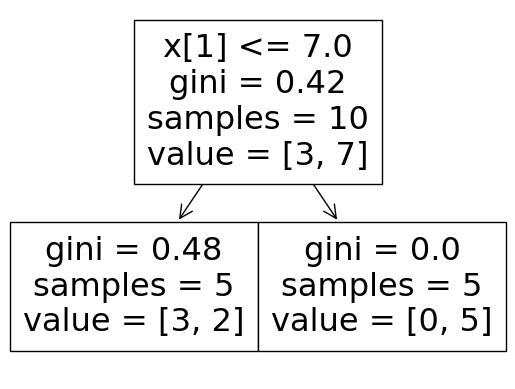

In [42]:
plot_tree(DT2)

<Axes: >

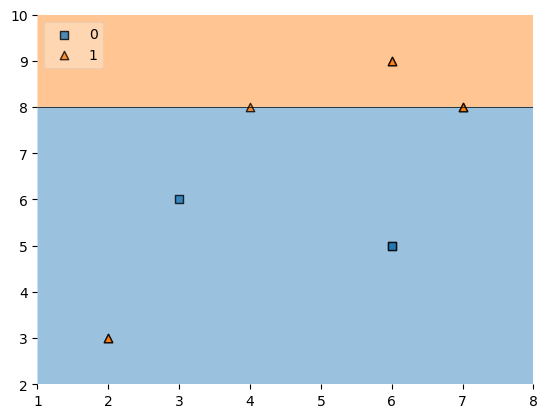

In [43]:
plot_decision_regions(X, y, clf=DT2, legend=2)

In [44]:
second_df["y_pred"] = DT2.predict(X)

In [45]:
second_df

,X1,X2,label,sample_weights,y_pred
5,6,9,1,0.1,1
5,6,9,1,0.1,1
7,7,8,1,0.1,1
2,3,6,0,0.1,0
7,7,8,1,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,0
3,4,8,1,0.1,1
1,2,3,1,0.1,0
1,2,3,1,0.1,0


In [46]:
alpha2 = calculate_model_weight(0.2)

In [47]:
alpha2

0.6931471805599453

In [48]:
# calculate the updated weight
def update_row_weights(row, alpha=0.69):
    if row['label'] == row['y_pred']:
        return row['sample_weights'] * np.exp(-alpha)
    else:
        return row['sample_weights'] * np.exp(alpha)

In [49]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis=1)

In [50]:
second_df

,X1,X2,label,sample_weights,y_pred,updated_weights
5,6,9,1,0.1,1,0.050158
5,6,9,1,0.1,1,0.050158
7,7,8,1,0.1,1,0.050158
2,3,6,0,0.1,0,0.050158
7,7,8,1,0.1,1,0.050158
6,6,5,0,0.1,0,0.050158
6,6,5,0,0.1,0,0.050158
3,4,8,1,0.1,1,0.050158
1,2,3,1,0.1,0,0.199372
1,2,3,1,0.1,0,0.199372


In [51]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['sample_weights'].sum()

In [52]:
second_df

,X1,X2,label,sample_weights,y_pred,updated_weights,normalized_weights
5,6,9,1,0.1,1,0.050158,0.050158
5,6,9,1,0.1,1,0.050158,0.050158
7,7,8,1,0.1,1,0.050158,0.050158
2,3,6,0,0.1,0,0.050158,0.050158
7,7,8,1,0.1,1,0.050158,0.050158
6,6,5,0,0.1,0,0.050158,0.050158
6,6,5,0,0.1,0,0.050158,0.050158
3,4,8,1,0.1,1,0.050158,0.050158
1,2,3,1,0.1,0,0.199372,0.199372
1,2,3,1,0.1,0,0.199372,0.199372


In [53]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']
second_df[['X1', 'X2', 'label', 'sample_weights', 'y_pred', 'updated_weights', 'cumsum_lower', 'cumsum_upper']]

,X1,X2,label,sample_weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
5,6,9,1,0.1,1,0.050158,0.000000,0.050158
5,6,9,1,0.1,1,0.050158,0.050158,0.100315
7,7,8,1,0.1,1,0.050158,0.100315,0.150473
2,3,6,0,0.1,0,0.050158,0.150473,0.200630
7,7,8,1,0.1,1,0.050158,0.200630,0.250788
6,6,5,0,0.1,0,0.050158,0.250788,0.300946
6,6,5,0,0.1,0,0.050158,0.300946,0.351103
3,4,8,1,0.1,1,0.050158,0.351103,0.401261
1,2,3,1,0.1,0,0.199372,0.401261,0.600632
1,2,3,1,0.1,0,0.199372,0.600632,0.800004


In [54]:
# random sampling for next DT
# generate 10 random weights

indexes = []

for i in range(second_df.shape[0]):
    a = np.random.random()
    for index, row in second_df.iterrows():
        if row['cumsum_upper'] > a and a>row['cumsum_lower']:
            indexes.append(index)

In [55]:
indexes

[3, 2, 7, 7, 5, 7, 1, 7, 6]

In [56]:
third_df = second_df.iloc[indexes]

In [57]:
third_df

,X1,X2,label,sample_weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
2,3,6,0,0.1,0,0.050158,0.050158,0.200630,0.150473
7,7,8,1,0.1,1,0.050158,0.050158,0.150473,0.100315
3,4,8,1,0.1,1,0.050158,0.050158,0.401261,0.351103
3,4,8,1,0.1,1,0.050158,0.050158,0.401261,0.351103
6,6,5,0,0.1,0,0.050158,0.050158,0.300946,0.250788
3,4,8,1,0.1,1,0.050158,0.050158,0.401261,0.351103
5,6,9,1,0.1,1,0.050158,0.050158,0.100315,0.050158
3,4,8,1,0.1,1,0.050158,0.050158,0.401261,0.351103
6,6,5,0,0.1,0,0.050158,0.050158,0.351103,0.300946


## Final prediction

## final_prediction = (alpha1*DT1 + alpha2*DT2)

##### aditive modeling

In [58]:
print(alpha1, alpha2)

0.42364893019360184 0.6931471805599453


In [59]:
query = np.array([[5, 1]])

In [60]:
DT1.predict(query)

C:\Users\Rishav\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [61]:
DT2.predict(query)

array([0], dtype=int64)

In [62]:
f = alpha1*(-1) + alpha2*(1)

In [63]:
final_prd = np.sign(f)

In [64]:
final_prd

1.0

In [65]:
query2 = np.array([[6, 9]])

In [66]:
DT1.predict(query2)

C:\Users\Rishav\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [67]:
DT2.predict(query2)

array([1], dtype=int64)

In [68]:
f2 = alpha1*(1) + alpha2*(-1)

In [69]:
f2

-0.26949825036634345

In [70]:
final_prd2 = np.sign(f2)

In [71]:
final_prd2

-1.0